# Projection plots for CERN HL YR

David Straub, 2018

In [1]:
import flavio
from wilson import Wilson
flavio.__version__

'1.0.1'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from projections import *

In [7]:
with open(PDAT, 'rb') as f:
    plotdata = pickle.load(f)

Hack to change number of sigma contours

In [8]:
def makesigma(pdat, levels):
    _pdat = pdat.copy()
    _pdat['levels'] = [0] + [flavio.statistics.functions.delta_chi2(n, dof=2) for n in levels]
    return _pdat

Plot

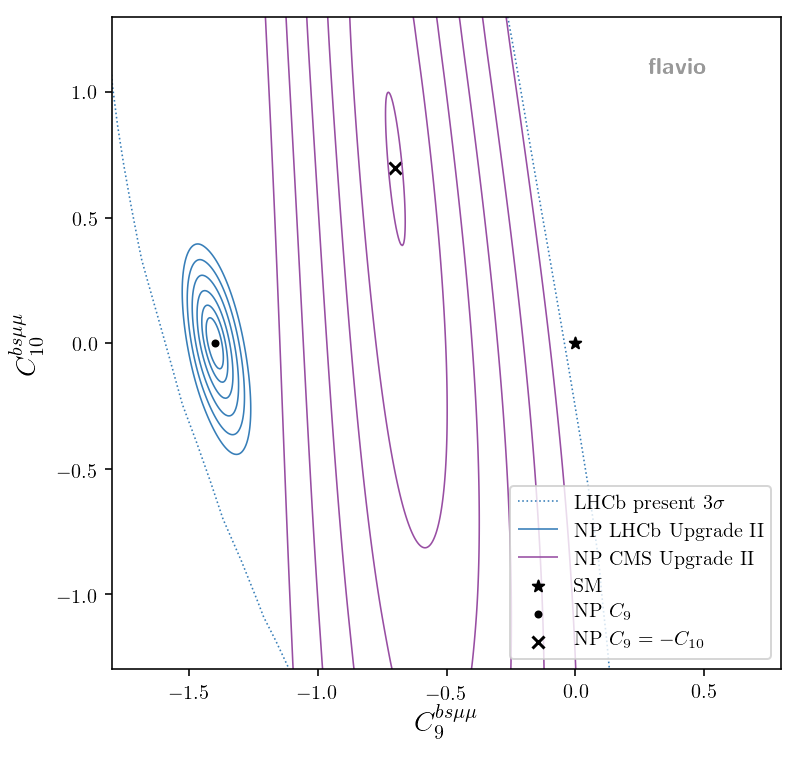

In [14]:
plt.figure(figsize=(6, 6))
fpl.contour(**makesigma(plotdata['LHCb']['present'], (3,)), label=r'LHCb present $3\sigma$', col=1, filled=False, contour_args=dict(linestyles=':'))
# fpl.contour(**makesigma(plotdata['CMS']['present'], (1,)), label=r'CMS present $3\sigma$', col=3, filled=False, contour_args=dict(linestyles=':'))
fpl.contour(**makesigma(plotdata['LHCb']['Phase II'], (1,2,3,4,5)), label='NP LHCb Upgrade II', col=1, filled=False, interpolation_factor=50)
fpl.contour(**makesigma(plotdata['CMS']['Phase II'], (1,2,3,4,5)), label='NP CMS Upgrade II', col=3, filled=False, interpolation_factor=50)
# fpl.contour(**makesigma(pdat['YR projection NP Belle-II'], (1,2,3,4,5)), label='NP Belle-II', col=2, filled=False, interpolation_factor=10)
plt.xlabel(r'$C_9^{bs\mu\mu}$')
plt.ylabel(r'$C_{10}^{bs\mu\mu}$')
plt.scatter([0], [0], marker='*', label='SM', c='k')
plt.scatter([-1.4], [0], marker='.', label='NP $C_9$', c='k')
plt.scatter([-0.7], [0.7], marker='x', label=r'NP $C_9=-C_{10}$', c='k')
plt.xlim([-1.8, 0.8])
plt.ylim([-1.3, 1.3])
plt.legend(loc='lower right');
fpl.flavio_branding(version=False)
# plt.savefig('YR_C9_C10.pdf', bbox_inches='tight')